In [1]:
import pandas as pd
import numpy as np

# visualisation libraries:
import matplotlib.pyplot as plt  # 2-d graphics
import seaborn as sns  # graphics for statistics
%matplotlib inline

# timeworks
import datetime 

# encoding 
from sklearn.preprocessing import OneHotEncoder 

import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

###
# Импорт всех нужных библиотек

from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics

## Data


In [2]:
data = pd.read_csv('nko_dropped.csv')
data.head()

,Unnamed: 0,regionName,fullName,dateReg,minjustForm,ogrn,opf,egrulStatus,mainOkved,regionCode,incomeTotal,inn,originDate,dateLiquid,address,okogu,hasRegionalSupport,addOkved,dateOgrn
0,0,Санкт-Петербург,МЕЖРЕГИОНАЛЬНАЯ АНТРОПОСОФСКАЯ МЕДИЦИНСКАЯ АСС...,NaN,"Объединения (союз, ассоциация) юридических лиц",1207800141790,"{'name': 'Ассоциации (союзы)', 'code': '20600'...",Действует,{'name': 'Деятельность профессиональных членск...,78,0.0,7.841091e+09,{'$date': '2020-10-30T00:00:00.000Z'},NaN,"191186, ГОРОД САНКТ-ПЕТЕРБУРГ, УЛИЦА ИТАЛЬЯНСК...","{'name': None, 'code': None}",False,[],{'$date': '2020-10-30T00:00:00.000Z'}
1,1,Москва,"ФОНД ""СОДЕЙСТВИЕ ДУХОВНОМУ РАЗВИТИЮ ЧЕЛОВЕКА ""...",NaN,Некоммерческий фонд,1207700349152,"{'name': 'Фонды', 'code': '70400', 'version': ...",Действует,{'name': 'Предоставление прочих финансовых усл...,77,0.0,7.720647e+09,{'$date': '2020-09-23T00:00:00.000Z'},NaN,"111395, ГОРОД МОСКВА, УЛИЦА МОЛДАГУЛОВОЙ, ДОМ ...","{'name': None, 'code': None}",False,"[{'name': 'Издание книг', 'code': '58.11', 've...",{'$date': '2020-09-23T00:00:00.000Z'}
2,2,Санкт-Петербург,"КОЛЛЕГИЯ АДВОКАТОВ ""САНКТ-ПЕТЕРБУРГСКАЯ КОЛЛЕГ...",NaN,Коллегия адвокатов,1207800011430,"{'name': 'Коллегии адвокатов', 'code': '20616'...",Действует,"{'name': 'Деятельность в области права', 'code...",78,0.0,7.813643e+09,{'$date': '2020-02-03T00:00:00.000Z'},NaN,"197198, ГОРОД САНКТ-ПЕТЕРБУРГ, УЛИЦА БОЛЬШАЯ П...","{'name': None, 'code': None}",False,[],{'$date': '2020-02-03T00:00:00.000Z'}
3,3,Москва,"ТОВАРИЩЕСТВО СОБСТВЕННИКОВ НЕДВИЖИМОСТИ ""ЛУГИН...",NaN,NaN,1207700348976,{'name': 'Товарищества собственников недвижимо...,Действует,{'name': 'Управление недвижимым имуществом за ...,77,0.0,7.733360e+09,{'$date': '2020-09-23T00:00:00.000Z'},NaN,"125424, ГОРОД МОСКВА, ШОССЕ ВОЛОКОЛАМСКОЕ, ДОМ...","{'name': None, 'code': None}",False,[{'name': 'Аренда и управление собственным или...,{'$date': '2020-09-23T00:00:00.000Z'}
4,4,Санкт-Петербург,"АВТОНОМНАЯ НЕКОММЕРЧЕСКАЯ ОРГАНИЗАЦИЯ ""ЦЕНТР С...",NaN,Автономная некоммерческая организация,1207800081500,{'name': 'Автономные некоммерческие организаци...,Действует,{'name': 'Деятельность по организации конферен...,78,0.0,7.813645e+09,{'$date': '2020-07-08T00:00:00.000Z'},NaN,"197198, ГОРОД САНКТ-ПЕТЕРБУРГ, УЛИЦА ЗВЕРИНСКА...","{'name': None, 'code': None}",False,[{'name': 'Исследование конъюнктуры рынка и из...,{'$date': '2020-07-08T00:00:00.000Z'}


In [3]:
# Табличка признаков 
data_agg = data.agg({'nunique', lambda s: s.unique()[:10]})\
    .append(pd.Series(data.isnull().sum(), name='null'))\
    .append(pd.Series(data.dtypes, name='dtype'))\
    .transpose()
data_agg

,nunique,<lambda>,null,dtype
Unnamed: 0,747034,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]",0,int64
regionName,86,"[Санкт-Петербург, Москва, Республика Марий Эл,...",25,object
fullName,665787,[МЕЖРЕГИОНАЛЬНАЯ АНТРОПОСОФСКАЯ МЕДИЦИНСКАЯ АС...,0,object
dateReg,12927,"[nan, {'$date': '1991-04-12T00:00:00.000Z'}, {...",425618,object
minjustForm,42,"[Объединения (союз, ассоциация) юридических ли...",285961,object
ogrn,747034,"[1207800141790, 1207700349152, 1207800011430, ...",0,int64
opf,291,"[{'name': 'Ассоциации (союзы)', 'code': '20600...",0,object
egrulStatus,2,"[Действует, Ликвидирована]",0,object
mainOkved,2209,[{'name': 'Деятельность профессиональных членс...,0,object
regionCode,93,"[78, 77, 12, 75, 23, 43, 30, 4, 50, 58]",0,int64


In [4]:
drop_cols = []

In [5]:
drop_cols.append('Unnamed: 0')

In [6]:
data.drop(columns = drop_cols, inplace = True )

Misses detected: 1061281


<AxesSubplot:>

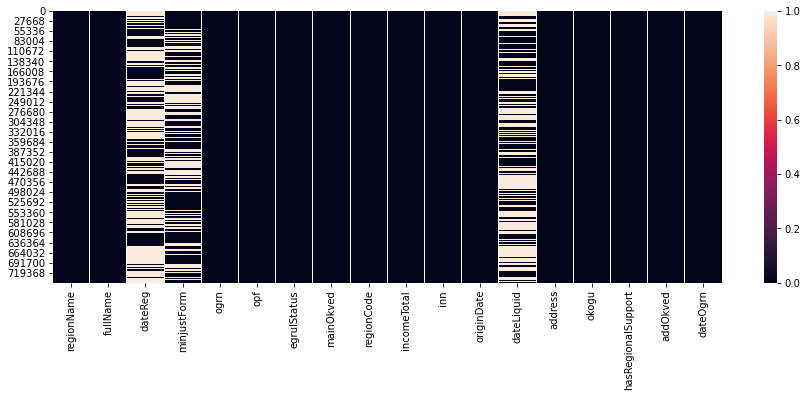

In [7]:
print('Misses detected:', data.isnull().sum().sum())

plt.subplots(figsize=(15, 5))
sns.heatmap(data.isnull())

Гипотезы: 
        
        НКО с с положительным флагом по hasRegionalSupport  будут иметь меньше шансов на грант. ДБ соцориентрованы, получают приоритетную поддержку от региона.
        НКО с признаком ОКОГУ чаще получают финансирование, чем НКО не относящиеся к органам госвласти. 
        ОПФ НКО может однозначно определять неполучение финансирования. 
        Регион НКО будет оказывать сильное влияние на получение финансирования.
        Срок жизни НКО будет оказывать сильное положительное влияние на вероятность получения финансирования. 
        

In [8]:
conclusions = []

####  Target
назанчим флаг target  по уровню дохода из открытых источников: 1 если такие поступления есть, 0 - если нет. 

In [9]:
data['target'] = np.nan

In [10]:
data.loc[data['incomeTotal'] > 0, 'target'] = 1 

In [11]:
data.target.fillna(0, inplace = True)

In [12]:
data.target.value_counts()


0.0    712729
1.0     34305
Name: target, dtype: int64

## Geo 

####  Region code 

Восстановим пропуски в кодахх региона

In [13]:
data.regionCode.value_counts()

77    80178
50    37927
78    31767
23    23337
66    23030
      ...  
99       91
81       84
88       65
82       31
0        25
Name: regionCode, Length: 93, dtype: int64

In [14]:
data[data.regionCode == 0]['address']

31530     420015, РЕСПУБЛИКА Татарстан, УЛИЦА К.МАРКСА, ...
46886     420100, РЕСПУБЛИКА ТАТАРСТАН, УЛИЦА ПРОСПЕКТ П...
51173     420140, РЕСПУБЛИКА ТАТАРСТАН, УЛИЦА КАРАТАУ, Д...
53316     420101, РЕСПУБЛИКА ТАТАРСТАН, УЛИЦА МАВЛЮТОВА,...
53323     РЕСПУБЛИКА ТАТАРСТАН, УЛИЦА Н.ЕРШОВА, ДОМ 28, ...
53841     420021, РЕСПУБЛИКА ТАТАРСТАН, УЛИЦА КАМАЛА ГАЛ...
54766     420044, РЕСПУБЛИКА ТАТАРСТАН, УЛИЦА ЯМАШЕВА, Д...
61942     420133, РЕСПУБЛИКА ТАТАРСТАН, УЛИЦА ЛАВРЕНТЬЕВ...
62898     420015, РЕСПУБЛИКА ТАТАРСТАН, УЛИЦА К.МАРКСА, ...
68375           РЕСПУБЛИКА ТАТАРСТАН, УЛИЦА ПРОСПЕКТ ПОБЕДЫ
69775     420045, РЕСПУБЛИКА ТАТАРСТАН, УЛИЦА Н.ЕРШОВА, ...
69901     420021, РЕСПУБЛИКА ТАТАРСТАН, УЛИЦА К.ТИНЧУРИН...
192669    420111, РЕСПУБЛИКА ТАТАРСТАН, УЛИЦА М.ДЖАЛИЛЯ,...
196977       РЕСПУБЛИКА ТАТАРСТАН, УЛИЦА К.ТИНЧУРИНА, ДОМ 3
499182    420140, РЕСПУБЛИКА ТАТАРСТАН, УЛИЦА ПРОСПЕКТ П...
615405    420103, РЕСПУБЛИКА ТАТАРСТАН, УЛИЦА АМИРХАНА, ...
618062    420111, РЕСПУБЛИКА ТАТАРСТАН, 

In [15]:
data[data.regionCode == 16]['ogrn'].count()

17103

In [16]:
data.loc[data.regionCode == 0, 'regionCode'] = 16


In [17]:
data.regionCode.value_counts()

77    80178
50    37927
78    31767
23    23337
66    23030
      ...  
80      105
99       91
81       84
88       65
82       31
Name: regionCode, Length: 92, dtype: int64

In [27]:
codes = [77, 50, 78, 23, 66]
for code in codes:
    print(data[data.regionCode == code].regionName)

1         Москва
3         Москва
5         Москва
6         Москва
7         Москва
           ...  
747006    Москва
747016    Москва
747020    Москва
747022    Москва
747029    Москва
Name: regionName, Length: 80178, dtype: object
18        Московская область
69        Московская область
71        Московская область
75        Московская область
76        Московская область
                 ...        
746969    Московская область
746981    Московская область
746988    Московская область
746996    Московская область
747015    Московская область
Name: regionName, Length: 37927, dtype: object
0         Санкт-Петербург
2         Санкт-Петербург
4         Санкт-Петербург
15        Санкт-Петербург
16        Санкт-Петербург
               ...       
746917    Санкт-Петербург
746920    Санкт-Петербург
746922    Санкт-Петербург
746987    Санкт-Петербург
746992    Санкт-Петербург
Name: regionName, Length: 31767, dtype: object
10        Краснодарский край
124       Краснодарский край
125      

In [29]:
conclusions.append('Топ-5 регионов, получающих финансирование: Москва, Московская область, Санкт-Петербург, Краснодарский край и Свердловская область.')

Посмотрим на региональные коды в свзяке с target 

In [43]:
df_reg_code = pd.DataFrame()
df_reg_code['granted']= data[data.target == 1].groupby('regionCode').ogrn.count() # получившие доход
#df_reg_code['nongranted'] = data[data.target == 0].groupby('regionCode').count() # неполучившие доход 
#df_reg_code['total_count'] = data.groupby('regionCode')['ogrn'].count() # всего зарегистрированных огрн в регион_коде
df_reg_code

,granted
regionCode,
1,64
2,706
3,259
4,137
5,188
...,...
86,520
87,19
89,174


In [34]:
data[data.regionCode==99][data.target == 0].ogrn.count() 

<ipython-input-34-585f8c8e335a>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data.regionCode==99][data.target == 0].ogrn.count() / data[data.regionCode == 99].ogrn.count()


1.0

In [37]:
data[data.regionCode == 99].ogrn.count()

91

In [36]:
df_reg_code.sort_values(by='nongranted', ascending=True)

,granted,nongranted,total_count
regionCode,,,
81,1,83,84
80,1,104,105
83,31,367,398
87,19,486,505
79,42,1155,1197
...,...,...,...
66,731,22299,23030
23,787,22550,23337
78,2286,29481,31767


In [54]:
codes =  list(set(data.regionCode))

In [55]:
codes

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 91,
 92,
 99]

In [58]:
for code in codes: 
    print(code, data[data.regionCode == code].groupby('target').ogrn.count())

1 target
0.0    1616
1.0      64
Name: ogrn, dtype: int64
2 target
0.0    15835
1.0      706
Name: ogrn, dtype: int64
3 target
0.0    4835
1.0     259
Name: ogrn, dtype: int64
4 target
0.0    1810
1.0     137
Name: ogrn, dtype: int64
5 target
0.0    6762
1.0     188
Name: ogrn, dtype: int64
6 target
0.0    1172
1.0      77
Name: ogrn, dtype: int64
7 target
0.0    2435
1.0      88
Name: ogrn, dtype: int64
8 target
0.0    1695
1.0      58
Name: ogrn, dtype: int64
9 target
0.0    1831
1.0      87
Name: ogrn, dtype: int64
10 target
0.0    5746
1.0     270
Name: ogrn, dtype: int64
11 target
0.0    4149
1.0     216
Name: ogrn, dtype: int64
12 target
0.0    3818
1.0     143
Name: ogrn, dtype: int64
13 target
0.0    4091
1.0     195
Name: ogrn, dtype: int64
14 target
0.0    8346
1.0     404
Name: ogrn, dtype: int64
15 target
0.0    2575
1.0     109
Name: ogrn, dtype: int64
16 target
0.0    16297
1.0      831
Name: ogrn, dtype: int64
17 target
0.0    1305
1.0      77
Name: ogrn, dtype: int64
18

In [59]:
# если ты на Байконуре - шансов нет...

In [60]:
conclusions.append('Есть ряд регионов, в которых ни одна НКО не получала финансирования из отрытых источников.')

## Date works

dateReg
dateReg: дата регистрации организаций - указывается только для организаций, зарегистрированных до 2002 года (тип: string, null)

In [61]:
data.originDate.isnull().sum()

0

In [62]:
data.originDate.isnull().sum()

0

In [63]:
data.originDate.value_counts()

{'$date': '1996-02-26T00:00:00.000Z'}    3638
{'$date': '2002-06-28T00:00:00.000Z'}    1338
{'$date': '1996-01-29T00:00:00.000Z'}    1269
{'$date': '1995-06-16T00:00:00.000Z'}    1259
{'$date': '1999-06-30T00:00:00.000Z'}    1045
                                         ... 
{'$date': '1961-04-14T00:00:00.000Z'}       1
{'$date': '1990-03-24T00:00:00.000Z'}       1
{'$date': '2011-01-05T00:00:00.000Z'}       1
{'$date': '1949-12-06T00:00:00.000Z'}       1
{'$date': '1976-06-08T00:00:00.000Z'}       1
Name: originDate, Length: 17004, dtype: int64

In [64]:
data['datebeg'] = data.originDate.apply(lambda x: eval(x)['$date'])
data['datebeg'] = pd.to_datetime(data.datebeg)
data.datebeg = data.datebeg.apply(lambda x: datetime.datetime.date(x))
data.dateLiquid.fillna(0, inplace=True)
data.dateLiquid = data.dateLiquid.apply(lambda x: datetime.datetime.today() if x == 0 else eval(x)['$date'])
data.dateLiquid = data.dateLiquid.apply(lambda x: datetime.datetime.date(x))

In [65]:
data.columns

Index(['regionName', 'fullName', 'dateReg', 'minjustForm', 'ogrn', 'opf',
       'egrulStatus', 'mainOkved', 'regionCode', 'incomeTotal', 'inn',
       'originDate', 'dateLiquid', 'address', 'okogu', 'hasRegionalSupport',
       'addOkved', 'dateOgrn', 'target', 'datebeg'],
      dtype='object')

In [66]:
data.datebeg

0         2020-10-30
1         2020-09-23
2         2020-02-03
3         2020-09-23
4         2020-07-08
             ...    
747029    2006-03-29
747030    2006-08-09
747031    1998-01-01
747032    1987-12-05
747033    1990-10-23
Name: datebeg, Length: 747034, dtype: object

In [67]:
life_nko = pd.DataFrame() 
life_nko['born'] = data.datebeg
life_nko['liquidated'] = data.dateLiquid
life_nko['lifetime'] = data.dateLiquid -data.datebeg
life_nko

,born,liquidated,lifetime
0,2020-10-30,2022-08-01,640 days
1,2020-09-23,2022-08-01,677 days
2,2020-02-03,2022-08-01,910 days
3,2020-09-23,2022-08-01,677 days
4,2020-07-08,2022-08-01,754 days
...,...,...,...
747029,2006-03-29,2009-01-12,1020 days
747030,2006-08-09,2012-08-15,2198 days
747031,1998-01-01,2006-10-11,3205 days
747032,1987-12-05,2006-06-05,6757 days


In [68]:
data['lifetime'] = data.dateLiquid - data.datebeg

In [69]:
data.lifetime.isnull().sum()

0

In [70]:
data.lifetime.value_counts()

0 days        2251
7339 days      504
9908 days      394
9615 days      386
8433 days      378
              ... 
14653 days       1
11335 days       1
16769 days       1
15316 days       1
17729 days       1
Name: lifetime, Length: 18859, dtype: int64

In [71]:
# есть ряд НКО, срок жизни которых составил 0. Удалим их.
data = data.drop(data[data.lifetime == 0].index)

##  Economics & opf

#### minjustForm

посмотрим на формы НКО

In [72]:
data.minjustForm.value_counts()

Общественная организация                                                    121679
Профессиональный союз                                                        52118
Автономная некоммерческая организация                                        51497
Некоммерческий фонд                                                          36325
Религиозная организация                                                      35915
Некоммерческое партнерство                                                   31086
Учреждение                                                                   26558
Садоводческие, огороднические, дачные и иные некоммерческие товарищества     24832
Товарищество собственников жилья                                             18628
Объединения (союз, ассоциация) юридических лиц                               18133
Общественный фонд                                                             8388
Политическая партия                                                           8005
Обще

In [73]:
df_minjustForm = pd.DataFrame()
df_minjustForm['granted'] = data[data.target == 1].groupby('minjustForm').ogrn.count()
df_minjustForm['nongranted'] = data[data.target == 0].groupby('minjustForm').ogrn.count()
df_minjustForm['total'] = data.groupby('minjustForm').ogrn.count()

In [74]:
df_minjustForm

,granted,nongranted,total
minjustForm,,,
Автономная некоммерческая организация,6891,44606.0,51497
Адвокатские палаты субъектов РФ,3,89.0,92
Адвокатское бюро,84,1013.0,1097
Ассоциация крестьянских (фермерских) хозяйств,7,660.0,667
Ассоциация экономического развития,7,197.0,204
Государственная корпорация,7,1.0,8
Государственно-общественное объединение,8,122.0,130
Движение,1,NaN,1
Иные некоммерческие организации,31,817.0,848


In [76]:
conclusions.append('Сведения о правовой форме НКО в системе классификации минюста показывает, что нет такой формы, которая никогда бы не получала финансирования.')

In [77]:
data.minjustForm.isnull().sum()

285961

логично обоснованного и легкого способа восстаановить формы НКО по УНРО Минюста не нашла, так что попробую с кодами опф.

#### opf

In [78]:
data.opf.isnull().sum()

0

In [79]:
data.opf.value_counts()

{'name': 'Общественные организации', 'code': '20200', 'version': 'okopf'}                               75444
{'name': 'Общественная или религиозная организация (объединение)', 'code': '83', 'version': 'okopf'}    72798
{'name': 'Гаражные и гаражно-строительные кооперативы', 'code': '20101', 'version': 'okopf'}            49868
{'name': 'Автономные некоммерческие организации', 'code': '71400', 'version': 'okopf'}                  46107
{'name': 'Потребительский кооператив', 'code': '85', 'version': 'okopf'}                                39622
                                                                                                        ...  
{'name': 'Акционерные общества', 'code': '12200', 'version': 'okopf'}                                       1
{'name': 'МУНИЦИПАЛЬНАЯ НЕКОММЕРЧИСКАЯ ОРГАНИЗАЦИЯ', 'code': None, 'version': 'raw_opf'}                    1
{'name': 'ИНОЕ', 'code': None, 'version': 'raw_opf'}                                                        1
{'name': '

In [80]:
type(data.opf[0])

str

In [81]:
# вытащим сам код опф 
data['opf_code'] = data.opf.apply(lambda x: eval(x)['code'])

In [82]:
data.opf_code.value_counts() 


20200    75444
83       72798
20101    49868
71400    46107
85       39622
         ...  
56           1
14100        1
92           1
65000        1
21002        1
Name: opf_code, Length: 158, dtype: int64

In [83]:
data.opf_code.isnull().sum()

45209

In [84]:
# попробуем заменить на наиболее часто встречающееся 
data.opf_code.fillna(20200, inplace=True)

In [85]:
data.opf_code.isnull().sum()


0

In [86]:
# теперь попробуем заменить сами коды - поскольку по смыслу они категориальны - количеством вхождений 
# data[newfeature] = data[feature].map(data.groupby(feature).size()). Dyakonov 
data['opf_count'] = data['opf_code'].map(data.groupby('opf_code')['ogrn'].count())
data['opf_count']

0         13486
1         10576
2          3440
3         26538
4         46107
          ...  
747029    23801
747030    16170
747031     1065
747032    39622
747033    39622
Name: opf_count, Length: 747034, dtype: int64

In [87]:
data.opf_count.isnull().sum()

0

#### okved

##### mainOkved

In [88]:
data['okved_main'] = data['mainOkved'].apply(lambda x: eval(x)['code'])

In [89]:
data.okved_main.value_counts()[:3]

94.99       76871
52.21.24    38247
94.91       31456
Name: okved_main, dtype: int64

In [90]:
# выведем названия 
data['okved_main_name'] = data['mainOkved'].apply(lambda x: eval(x)['name'])

In [91]:
data.okved_main_name.value_counts()[:3]

Деятельность прочих общественных организаций, не включенных в другие группировки    101190
Деятельность стоянок для транспортных средств                                        38247
Деятельность религиозных организаций                                                 32517
Name: okved_main_name, dtype: int64

In [92]:
okved_granted = pd.DataFrame()
okved_granted['okved_name'] = data[data.target == 1].groupby('okved_main_name')['ogrn'].count().sort_values(ascending=False)
okved_granted

,okved_name
okved_main_name,
"Деятельность прочих общественных организаций, не включенных в другие группировки",8358
Образование профессиональное дополнительное,1904
Управление эксплуатацией жилого фонда за вознаграждение или на договорной основе,1448
"Деятельность по дополнительному профессиональному образованию прочая, не включенная в другие группировки",1207
"Предоставление прочих финансовых услуг, кроме услуг по страхованию и пенсионному обеспечению, не включенных в другие группировки",1061
...,...
Производство разных машин специального назначения и их составных частей,1
Производство соковой продукции из фруктов и овощей,1
"Производство статуэток, рам для фотографий, картин, зеркал и прочих декоративных изделий из недрагоценных металлов",1


In [93]:
okved_target = pd.DataFrame()
okved_target['granted'] = data[data.target == 1].groupby('okved_main_name')['ogrn'].count()
okved_target['non_granted'] = data[data.target == 0].groupby('okved_main_name')['ogrn'].count() 
okved_target['total'] = data.groupby('okved_main_name').ogrn.count()
okved_target

,granted,non_granted,total
okved_main_name,,,
Аренда и лизинг железнодорожного транспорта и оборудования,1,NaN,1
Аренда и лизинг легковых автомобилей и легких автотранспортных средств,2,18.0,20
"Аренда и лизинг прочих видов транспорта, оборудования и материальных средств, не включенных в другие группировки",1,6.0,7
Аренда и лизинг прочих сухопутных транспортных средств и оборудования,1,5.0,6
Аренда и управление собственным или арендованным жилым недвижимым имуществом,3,150.0,153
...,...,...,...
Физкультурно-оздоровительная деятельность,3,431.0,434
"Финансовое посредничество, не включенное в другие группировки",7,1128.0,1135
"ЭКСПЛУАТАЦИЯ ГАРАЖЕЙ, СТОЯНОК ДЛЯ АВТОТРАНСПОРТНЫХ СРЕДСТВ, ВЕЛОСИПЕДОВ И Т.П.",1,12.0,13


In [94]:
all_granted_okved = okved_target[okved_target.granted == okved_target.total]
all_granted_okved

,granted,non_granted,total
okved_main_name,,,
Аренда и лизинг железнодорожного транспорта и оборудования,1,NaN,1
"ДЕЯТЕЛЬНОСТЬ, СВЯЗАННАЯ С ИСПОЛЬЗОВАНИЕМ ВЫЧИСЛИТЕЛЬНОЙ ТЕХНИКИ И ИНФОРМАЦИОННЫХ ТЕХНОЛОГИЙ",1,NaN,1
Деятельность аэропортовая,1,NaN,1
Деятельность в области метрологии,1,NaN,1
"Деятельность вспомогательная прочая, связанная с железнодорожным транспортом",1,NaN,1
Деятельность казино,1,NaN,1
Деятельность по обеспечению безопасности в области использования атомной энергии,1,NaN,1
"Деятельность по управлению компьютерным оборудованием прочая, не включенная в другие группировки",1,NaN,1
Обработка металлических изделий механическая,1,NaN,1


In [96]:
data.okved_main.isnull().sum()

204681

In [97]:
# пропусков много, заполним наиболее частов встречающимся кодом 94.99
data.okved_main.fillna('94.99', inplace=True)

In [98]:
data.okved_main.isnull().sum()

0

In [99]:
# закодируем аналогично количеством вхождений огрн в код оквэд 
data['okved_m_count'] = data['okved_main'].map(data.groupby('okved_main')['ogrn'].count())

### Labelencoding


In [100]:
data.okogu[0]

"{'name': None, 'code': None}"

In [101]:
# заменим в окогу словарь на код 
data.okogu = data.okogu.apply(lambda x:eval(x)['code']) 

In [102]:
data.okogu.isnull().sum()


399597

In [103]:
# заменим коды окогу просто признаком наличия: 1 или отсутствия:0

data.okogu = data.okogu.apply(lambda x: 0 if x == None else 1)
data.okogu.value_counts()

0    399597
1    347437
Name: okogu, dtype: int64

In [104]:
# заменим статусы ЕГРЮЛ: 1: действующая организация, 0: недействующая

data.egrulStatus = data.egrulStatus.apply(lambda x: 1 if x == 'Действует' else 0)
data.egrulStatus.value_counts() 

0    406134
1    340900
Name: egrulStatus, dtype: int64

In [105]:
data.hasRegionalSupport.value_counts()

False    735769
True      11265
Name: hasRegionalSupport, dtype: int64

In [106]:
# закодируем признак социальноориентированных НКО, имеющих региональную поддержку 
data.hasRegionalSupport = data.hasRegionalSupport.apply(lambda x: 1 if x==True else 0)
data.hasRegionalSupport.value_counts()

0    735769
1     11265
Name: hasRegionalSupport, dtype: int64

##  Model

In [107]:
data_agg = data.agg({'nunique', lambda s: s.unique()[:10]})\
    .append(pd.Series(data.isnull().sum(), name='null'))\
    .append(pd.Series(data.dtypes, name='dtype'))\
    .transpose()
data_agg

,<lambda>,nunique,null,dtype
regionName,"[Санкт-Петербург, Москва, Республика Марий Эл,...",86,25,object
fullName,[МЕЖРЕГИОНАЛЬНАЯ АНТРОПОСОФСКАЯ МЕДИЦИНСКАЯ АС...,665787,0,object
dateReg,"[nan, {'$date': '1991-04-12T00:00:00.000Z'}, {...",12927,425618,object
minjustForm,"[Объединения (союз, ассоциация) юридических ли...",42,285961,object
ogrn,"[1207800141790, 1207700349152, 1207800011430, ...",747034,0,int64
opf,"[{'name': 'Ассоциации (союзы)', 'code': '20600...",291,0,object
egrulStatus,"[1, 0]",2,0,int64
mainOkved,[{'name': 'Деятельность профессиональных членс...,2209,0,object
regionCode,"[78, 77, 12, 75, 23, 43, 30, 4, 50, 58]",92,0,int64
incomeTotal,"[0.0, 11464477.21, 1096727.62, 235672.5, 10607...",28326,0,float64


In [108]:
drop_cols = ['ogrn', 'regionName', 'fullName', 'dateReg', 'minjustForm', 'opf', 'mainOkved', 'inn', 'originDate', 'dateLiquid', 'address', 'addOkved', 'dateOgrn', 'datebeg', 'okved_main', 'okved_main_name', 'incomeTotal']
data.drop(columns=drop_cols, inplace=True)

In [109]:
#data['lifetime']=data['lifetime'].map(datetime.datetime.toordinal)
# data['lifetime'] = data['lifetime'].datetime.days.astype('int8')
data['lifetime'] = data['lifetime'].astype('timedelta64[D]').astype(int)

In [110]:
y = data['target'].values
X = data.drop(['target'], axis = 1)

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=27)

In [112]:
model = RandomForestRegressor(
    n_estimators=100, verbose=1, n_jobs=-1, random_state=27)

In [113]:
# training model
model.fit(X_train, y_train)

# using model for prognosing rating in test data
# Prognosis is being written to y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   55.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.1min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.8s finished


In [114]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.07001715716148625


<AxesSubplot:>

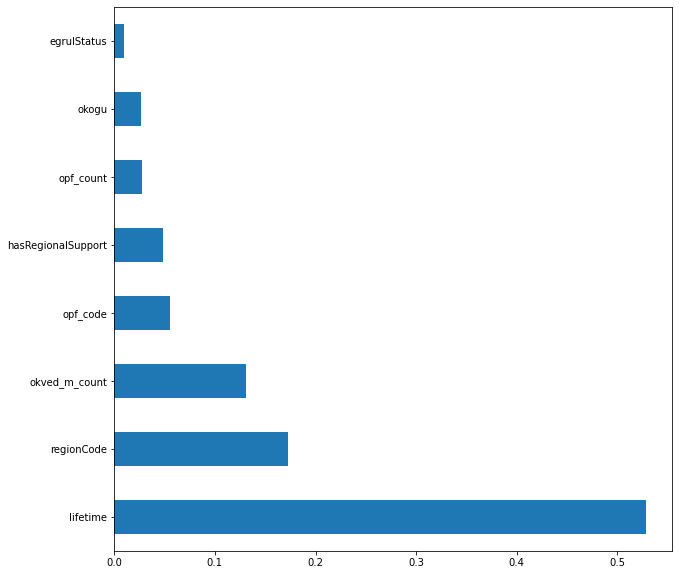

In [115]:
# in RandomForestRegressor it's possible to show the most important features used for prognosing
plt.rcParams['figure.figsize'] = (10, 10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [117]:
conclusions.append('Срок жизни компании оказался наиболее значимым признаком для прогноза вероятности получения финансирования.')

Стояли следующие вопросы: 

* Проверить, есть ли зависимость вероятности получения грантов от государства / госконтрактов от региона регистрации организации

Зависимость есть и довольно сильная:
    Есть ряд регионов, в которых ни одна НКО не получала финансирования из открытых источников.
    Топ-5 регионов, получающих финансирование: Москва, Московская область, Санкт-Петербург, Краснодарский край и Свердловская область.

* Проверить, есть ли зависимость вероятности получения грантов от государства / госконтрактов от возраста организации

Срок жизни компании оказался наиболее значимым признаком для прогноза вероятности получения финансирования.


* Проверить, есть ли зависимость вероятности получения грантов от государства / госконтрактов от экономической деятельности

Экономическая деятельность компании стала третьим по значимости признаком для прогноза вероятности получения грантов.


* Любые дополнительные выводы и проверки.

Сведения о правовой форме НКО в системе классификации минюста показывает, что нет такой формы, которая никогда бы не получала финансирования. 